# Project Title: Uber Fare Prediction 

# Description:
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.


## Problem Statement

This case study is to predict the price of the Uber ride from a given pickup point to the agreed dropoff location. Evaluating the models & compare their respective scores like R2, RMSE, etc.

**The datset contains the following fields:**

key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from statsmodels.tools.eval_measures import rmse

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

**Read data**

In [2]:
# Here we are importing dataset by using pandas
data = pd.read_csv('uber.csv')

In [3]:
# always create a copy 
df = data.copy()

In [4]:
# see the complete dataframe
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


(200000, 9)

In [7]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1)

In [9]:
df.shape

(200000, 7)

# EDA 

In [10]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [12]:
df.shape

(200000, 7)

In [13]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

In [14]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [15]:
df_new=df.dropna()
df_new.shape

(199999, 7)

In [16]:
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [17]:
df.dtypes


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

From the above output, we see that the data type of 'pickup_datetime' is 'object 

But according to data definition, 'pickup_datetime'is a date time stamp variable, which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.

**change the Incorrect data type.**

In [18]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 
# For datetime64[ns] types, NaT represents missing values.

In [19]:
df_new=df['pickup_longitude']
count=0
'''for i in range (0,200000):
    if df_new[i]==0:
        print(i)
        count=count+1
print(count)'''

'for i in range (0,200000):\n    if df_new[i]==0:\n        print(i)\n        count=count+1\nprint(count)'

**Recheck the data type**

In [20]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [21]:
# we will extract time feature from the 'pickup_datetime' 
# we will add a variable which measures the distance between pickup and drop

In [22]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   hour               200000 non-null  int64              
 8   day                200000 non-null  int64              
 9   month              200000 non-null  int64              
 10  year               200000 non-null  int64              
 11  dayofweek          200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), flo

In [24]:
from math import *

In [25]:
df.head()
df.shape

(200000, 12)

#Here we are going to use **Heversine formula** to calculate the distance between two points and journey, using the longitude and latitude values.

# Haversine formula 
hav(θ) = sin**2(θ/2).


In [26]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [27]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

In [28]:
#check the dataset
df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  dist_travel_km  
0  2015          3        1.683323  
1  2009          4        2.457590  
2  2009          0        5.036377  
3  2009          4        1.661683  
4  2014          3        4.475450

In [29]:
# now we can drop the pickup_datetime variable beacause now we got the distance 
#and it becomes redundant now. 

In [30]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
 6   hour               200000 non-null  int64  
 7   day                200000 non-null  int64  
 8   month              200000 non-null  int64  
 9   year               200000 non-null  int64  
 10  dayofweek          200000 non-null  int64  
 11  dist_travel_km     199999 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 18.3 MB


In [32]:
# as now we get the required variable and in the required in datatype so now we can move further.

In [34]:
df.describe().transpose()

count         mean         std          min  \
fare_amount        200000.0    11.359955    9.901776   -52.000000   
pickup_longitude   200000.0   -72.527638   11.437787 -1340.648410   
pickup_latitude    200000.0    39.935885    7.720539   -74.015515   
dropoff_longitude  199999.0   -72.525292   13.117408 -3356.666300   
dropoff_latitude   199999.0    39.923890    6.794829  -881.985513   
passenger_count    200000.0     1.684535    1.385997     0.000000   
hour               200000.0    13.491335    6.515531     0.000000   
day                200000.0    15.704670    8.687409     1.000000   
month              200000.0     6.281795    3.438925     1.000000   
year               200000.0  2011.742440    1.856397  2009.000000   
dayofweek          200000.0     3.048425    1.946946     0.000000   
dist_travel_km     199999.0    20.855350  382.964642     0.000000   

                           25%          50%          75%           max  
fare_amount           6.000000     8.500000    12.500000    499.000000  
pickup_longitude    -73.992065   -73.981823   -73.967154     57.418457  
pickup_latitude      40.734796    40.752592    40.767158   1644.421482  
dropoff_longitude   -73.991407   -73.980093   -73.963658   1153.572603  
dropoff_latitude     40.733823    40.753042    40.768001    872.697628  
passenger_count       1.000000     1.000000     2.000000    208.000000  
hour                  9.000000    14.000000    19.000000     23.000000  
day                   8.000000    16.000000    23.000000     31.000000  
month                 3.000000     6.000000     9.000000     12.000000  
year               2010.000000  2012.000000  2013.000000   2015.000000  
dayofweek             1.000000     3.000000     5.000000      6.000000  
dist_travel_km        1.215222     2.120992     3.875169  16409.239135

The above output illustrates the summary statistics of all the numeric variables like mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.


 Note that the minimum amount is -52 and maximum is 499. Ideally fare amount should not be less that 2.5 dollars, which is the minimum value set for fares. Also the minimum count of passengers is 0, which isn't a practical scenario. We will deal with such values as we progress the case study.

In [36]:
df.columns[df.dtypes == 'object']

Index([], dtype='object')

As, there are no categorical varaibles.

# Discover of outliers

### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.
Let us detect the extreme values in the data. 


The following can be considered as outliers in this case study:
1. Amount < -52
2. Trips with travel distance less than or equal to 0, and more than 130Kms
3. Trips where 90< latitude <-90, 180 < longitude < -180    

1. We have seen that there are instances of fare_amount less that 0 as well in the data set, where as the minimum fare for any trip is -52 dollars, hence we will remove such observations. We have already seen that the max fare is 499 in the data set.

In [37]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217                1    19    7      5  2015          3   
1         40.750325                1    20   17      7  2009          4   
2         40.772647                1    21   24      8  2009          0   
3         40.803349                3     8   26      6  2009          4   
4         40.761247                5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [38]:
df.fare_amount.min()

-52.0

In [39]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

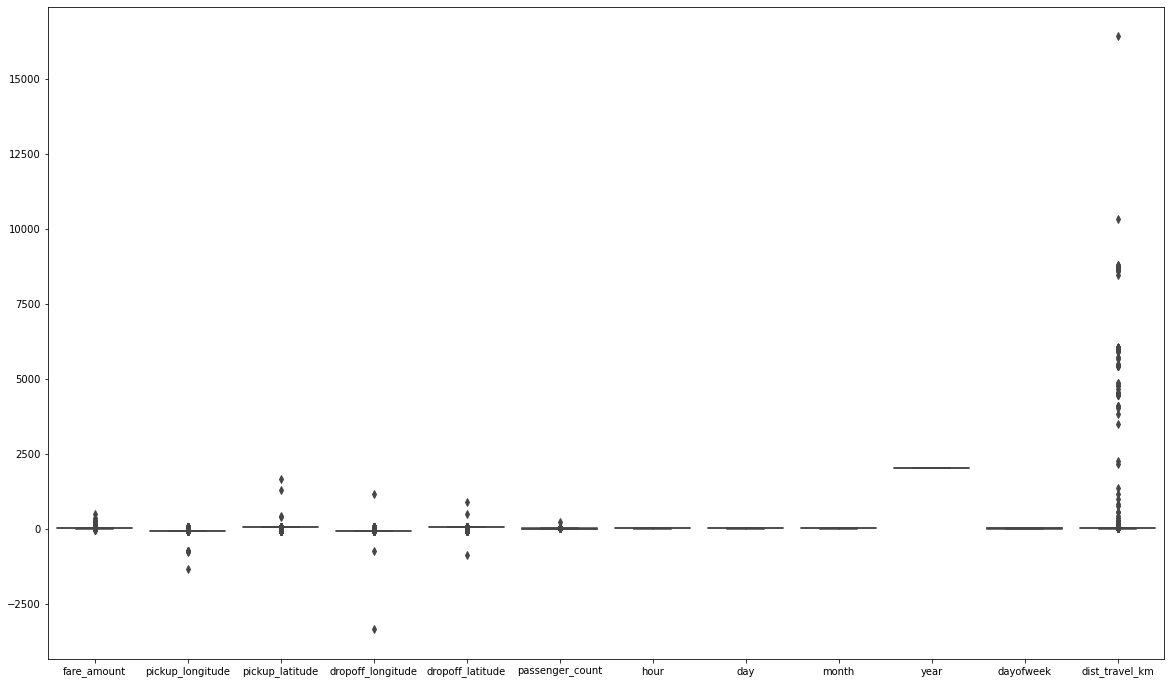

In [40]:
plt.figure(figsize=(20,12))
sns.boxplot(data= df)

In [41]:
medianFiller = lambda x : x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis = 0)

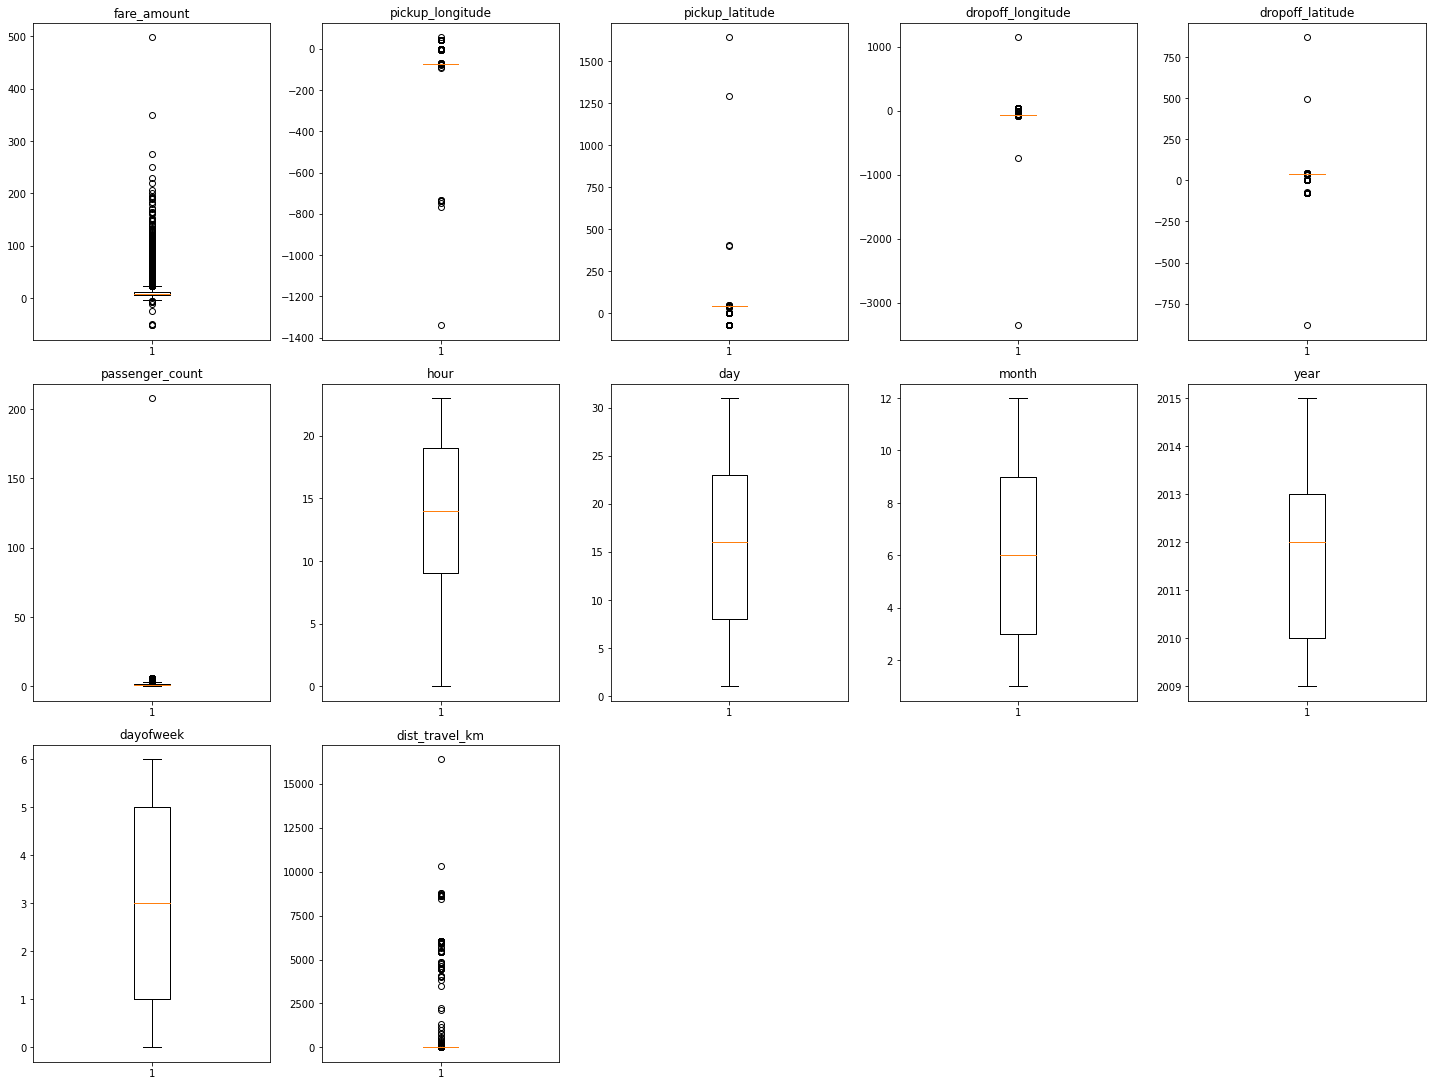

In [42]:
# outliers detection using boxplot
plt.figure(figsize =(20, 30))

for i , variable in enumerate(numeric_columns):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

In [43]:
df.shape

(200000, 12)

In [44]:
#We will only keep the observation where fare is between 2.5
df = df.loc[(df.fare_amount >= 0)]

In [45]:
df.shape

(199983, 12)

In [46]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217                1    19    7      5  2015          3   
1         40.750325                1    20   17      7  2009          4   
2         40.772647                1    21   24      8  2009          0   
3         40.803349                3     8   26      6  2009          4   
4         40.761247                5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [47]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [48]:
df = treat_outliers_all(df , df.iloc[: , 0::])

In [35]:
df['pickup_longitude'].quantile(0.25)

-73.992065

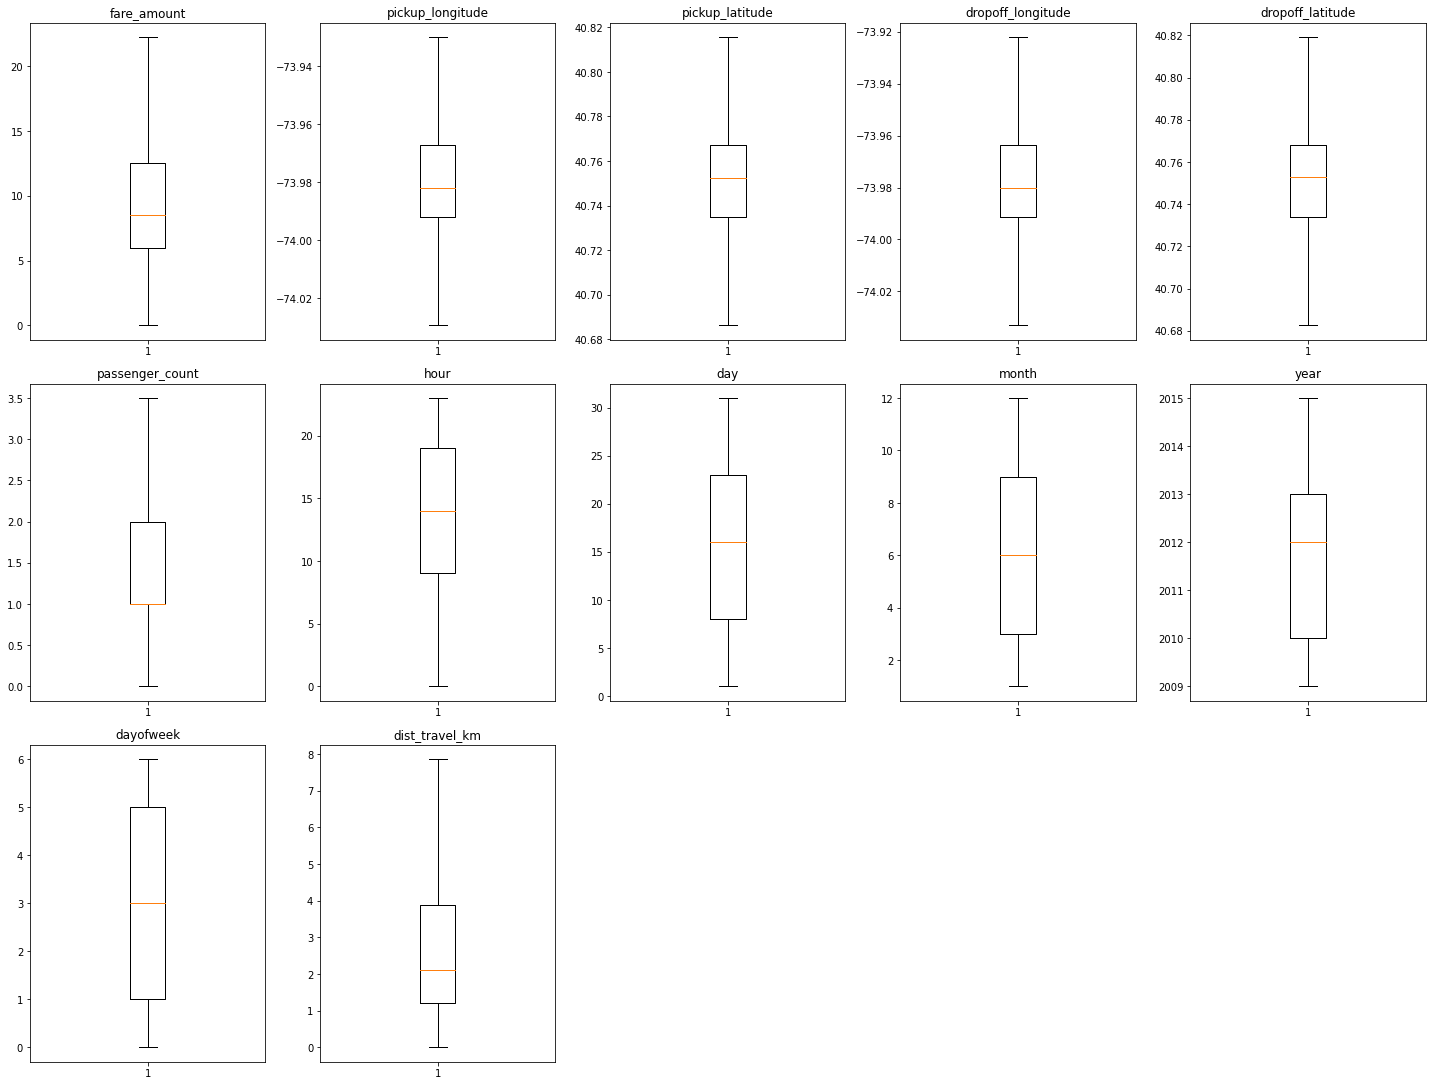

In [49]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(df.iloc[: , 0::]):
    plt.subplot(6,5,i+1)
    plt.boxplot(df[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [50]:
df.shape

(199983, 12)

2. Remove the observations with travel distance more than 130 kms.As seen from descriptive stats there are obs with travel distance more than 130 km, as that is the limit for trips.

In [51]:
#We will only keep the observation where travel distance is less than or equal to 130
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (199983, 12)


3. Remove the observations with unreal longitude and latitude values , that is , 90< latitude <-90, 180 < longitude < -180

In [52]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [53]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [54]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.929788        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217              1.0    19    7      5  2015          3   
1         40.750325              1.0    20   17      7  2009          4   
2         40.772647              1.0    21   24      8  2009          0   
3         40.803349              3.0     8   26      6  2009          4   
4         40.761247              3.5    17   28      8  2014          3   

   dist_travel_km  
0        1.683323  
1        2.457590  
2        5.036377  
3        1.661683  
4        4.475450

In [55]:
df.shape

(199983, 12)

# Missing Values

In [56]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

Total  Percentage of Missing Values     Type
fare_amount            0                           0.0  float64
pickup_longitude       0                           0.0  float64
pickup_latitude        0                           0.0  float64
dropoff_longitude      0                           0.0  float64
dropoff_latitude       0                           0.0  float64
passenger_count        0                           0.0  float64
hour                   0                           0.0    int64
day                    0                           0.0    int64
month                  0                           0.0    int64
year                   0                           0.0    int64
dayofweek              0                           0.0    int64
dist_travel_km         0                           0.0  float64

In [57]:
#visulize the missing values by heatmap 

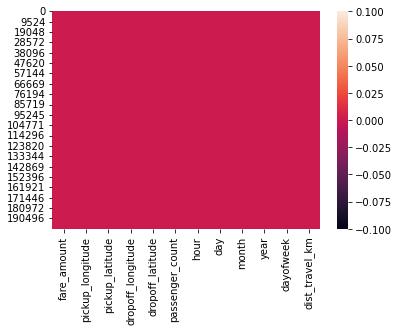

In [58]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull())

# display the plot
plt.show()

**There is no missing values in the data.**

# correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

## compute a correlation matrix

In [59]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df.corr()

# print the correlation matrix
corr

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.154131        -0.110889   
pickup_longitude      0.154131          1.000000         0.259520   
pickup_latitude      -0.110889          0.259520         1.000000   
dropoff_longitude     0.218709          0.425632         0.048864   
dropoff_latitude     -0.125933          0.073295         0.515749   
passenger_count       0.015882         -0.013242        -0.012881   
hour                 -0.023607          0.011585         0.029683   
day                   0.004443         -0.003201        -0.001531   
month                 0.030640          0.001186         0.001565   
year                  0.141429          0.010276        -0.014228   
dayofweek             0.013604         -0.024638        -0.042307   
dist_travel_km        0.844568          0.098030        -0.046816   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.218709         -0.125933         0.015882   
pickup_longitude            0.425632          0.073295        -0.013242   
pickup_latitude             0.048864          0.515749        -0.012881   
dropoff_longitude           1.000000          0.245685        -0.009312   
dropoff_latitude            0.245685          1.000000        -0.006295   
passenger_count            -0.009312         -0.006295         1.000000   
hour                       -0.046589          0.019760         0.020280   
day                        -0.004021         -0.003475         0.002699   
month                       0.002389         -0.001194         0.010399   
year                        0.011367         -0.009545        -0.009736   
dayofweek                  -0.003305         -0.031924         0.048566   
dist_travel_km              0.186524         -0.038837         0.009686   

                       hour       day     month      year  dayofweek  \
fare_amount       -0.023607  0.004443  0.030640  0.141429   0.013604   
pickup_longitude   0.011585 -0.003201  0.001186  0.010276  -0.024638   
pickup_latitude    0.029683 -0.001531  0.001565 -0.014228  -0.042307   
dropoff_longitude -0.046589 -0.004021  0.002389  0.011367  -0.003305   
dropoff_latitude   0.019760 -0.003475 -0.001194 -0.009545  -0.031924   
passenger_count    0.020280  0.002699  0.010399 -0.009736   0.048566   
hour               1.000000  0.004683 -0.003906  0.002135  -0.086934   
day                0.004683  1.000000 -0.017382 -0.012133   0.005625   
month             -0.003906 -0.017382  1.000000 -0.115862  -0.008815   
year               0.002135 -0.012133 -0.115862  1.000000   0.006097   
dayofweek         -0.086934  0.005625 -0.008815  0.006097   1.000000   
dist_travel_km    -0.038345  0.003036  0.011613  0.024332   0.027091   

                   dist_travel_km  
fare_amount              0.844568  
pickup_longitude         0.098030  
pickup_latitude         -0.046816  
dropoff_longitude        0.186524  
dropoff_latitude        -0.038837  
passenger_count          0.009686  
hour                    -0.038345  
day                      0.003036  
month                    0.011613  
year                     0.024332  
dayofweek                0.027091  
dist_travel_km           1.000000

**Plot the heatmap for the diagonal correlation matrix**

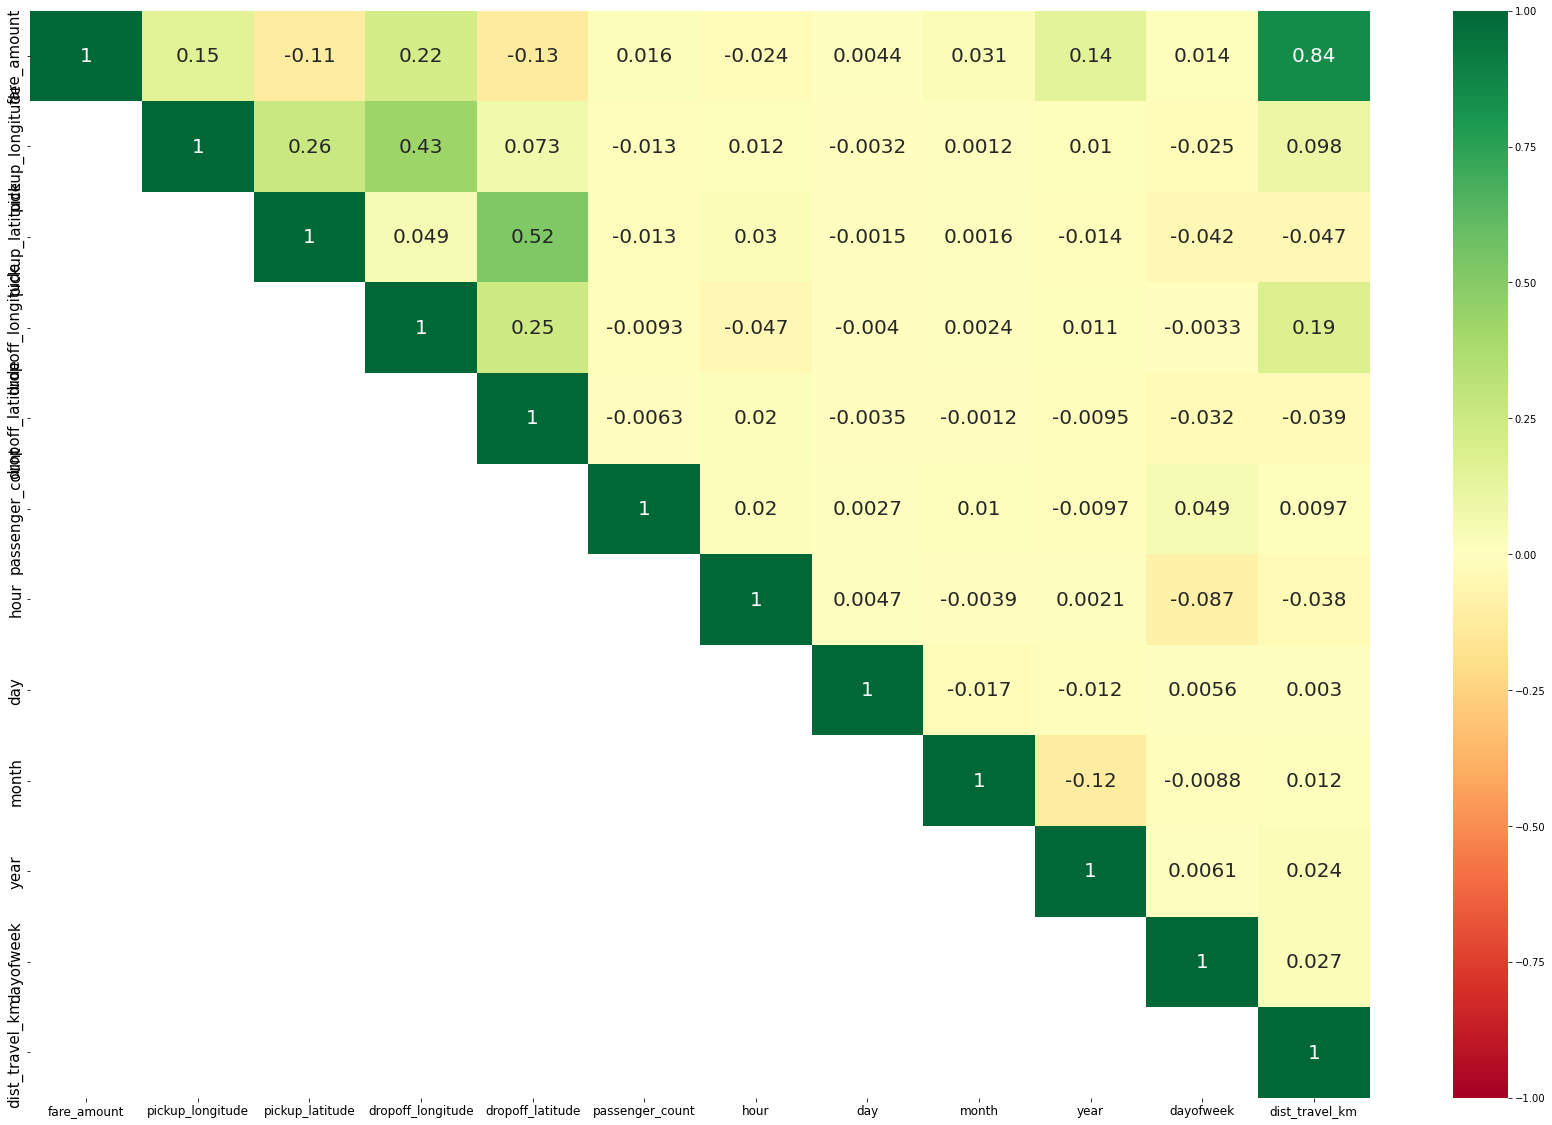

In [60]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

The diagonal entries are all '1' which represents the correlation of the variable with itself. The dark green squares represent the variables with strong positive correlation. The dark red squares represent the variables with strong negative correlation. 

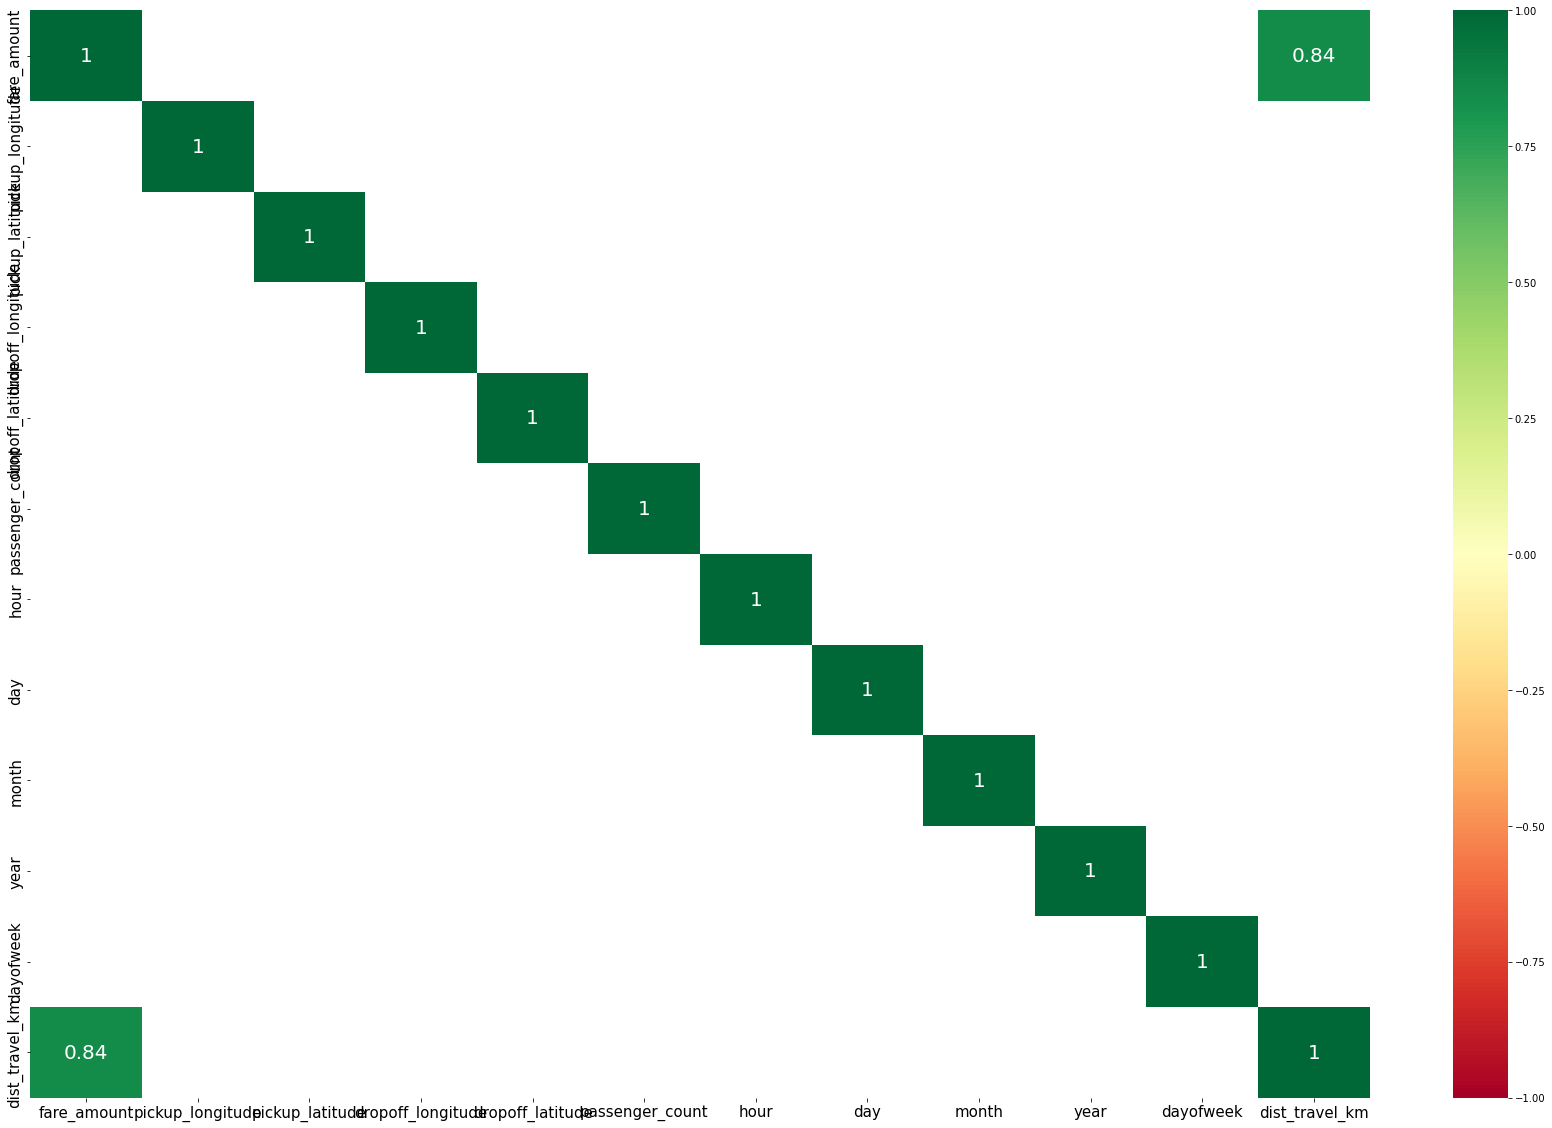

In [61]:
# set figure size
plt.figure(figsize=(30, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

The above plot shows that there is highest positive correlation (= 0.83) between the variables 'longitude_of_pickup' and 'longitude_of_dropoff'. Also there is strong positive correlation between the pair latitude_of_pickup and latitude_of_dropoff. These variables may be involved in multicollinearity.<br>
                        Following variable pairs have strong negative correlation in the dataset(longitude_of_pickup,latitude_of_pickup), (latitude_of_dropoff,longitude_of_pickup),(longitude_of_dropoff,latitude_of_pickup) and (longitude_of_dropoff, latitude_of_dropoff).


Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

# we are going to check the peak hours during weekdays

**1.Weekdays**

**2.Weekends**

**1. Plot a countplot to check the peak hours during weekdays**

<AxesSubplot:title={'center':'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

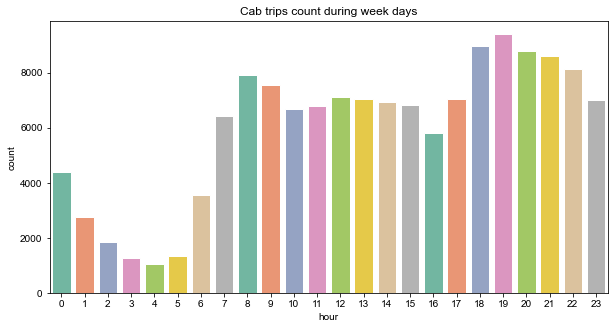

In [62]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week days')
sns.set_style("white")
#plot the countplot for weekdays
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 0) & (df.dayofweek <=4)], palette='Set2')

**2. Plot a countplot to check the peak hours during weekends**

<AxesSubplot:title={'center':'Cab trips count during week ends'}, xlabel='hour', ylabel='count'>

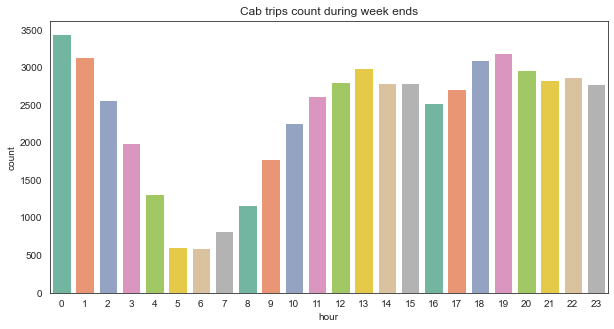

In [63]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(10,5))
plt.title('Cab trips count during week ends')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='hour', data=df.loc[(df.dayofweek >= 5) & (df.dayofweek <=6)], palette='Set2')

From the above plot, we can notice that the pattern for demand of Cab is different for weekdays and weekends.

# Mean fare for each hour during weekdays and weekends

We will check the mean fares for each hour during the weekdays and weekends.

**Compute the hourly mean fare for weekdays and weekends**

In [64]:
# Set the days in the dataset as week days and week ends
week_days = df.loc[(df.dayofweek >= 0) & (df.dayofweek <= 4)]
week_ends = df.loc[(df.dayofweek >= 5) & (df.dayofweek <= 6)]

# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).fare_amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).fare_amount.mean().to_frame().reset_index()

**Plot the mean fare**

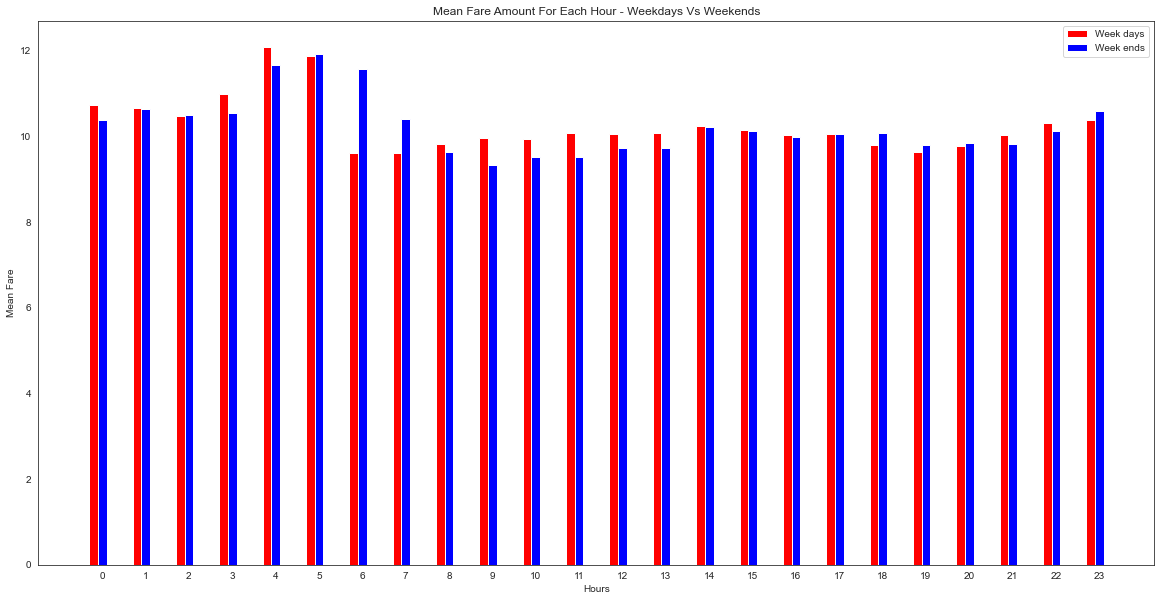

In [65]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare 
y = np.array(week_days_fare.fare_amount)
# an array of week end fare
z = np.array(week_ends_fare.fare_amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amount For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

We notice that the mean fares for each hour are different for week days and week ends.

# Distribution of key numerical vairables

**We will check the distribustion of 'travel_dist_km' and 'amount'**

**Distribution of "fare_amount"**

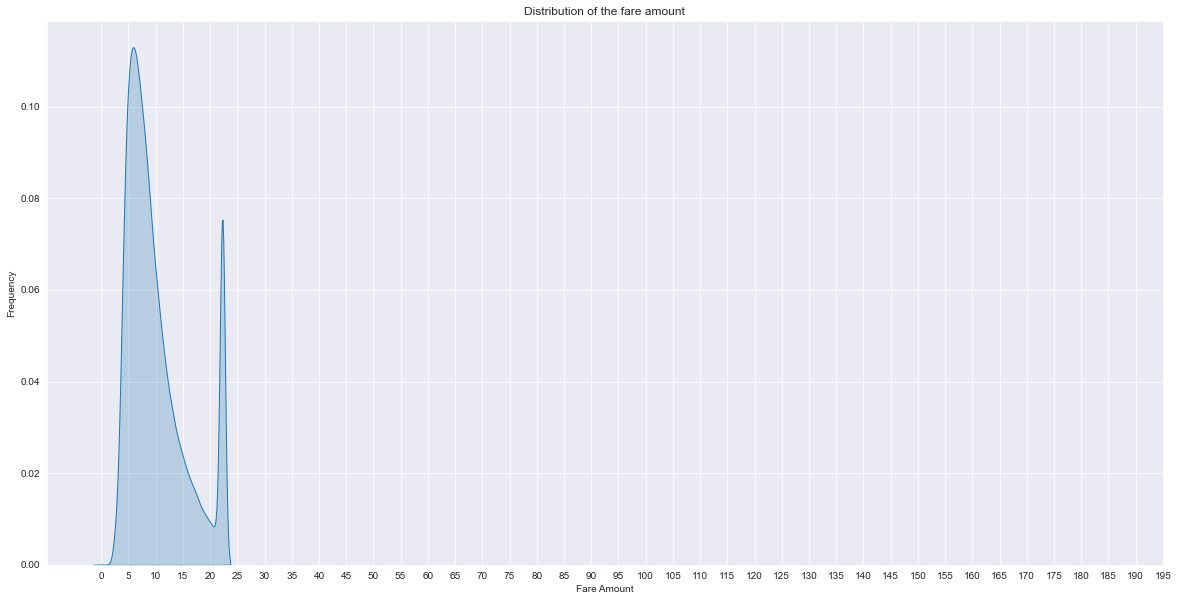

In [66]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(df.fare_amount, shade=True)

We can see that most the trips have a fare amount of 2 to 20 dollars. There are a few small peaks around 50 and 60 dollars as well.

**Distribustion of the travel distance in km**

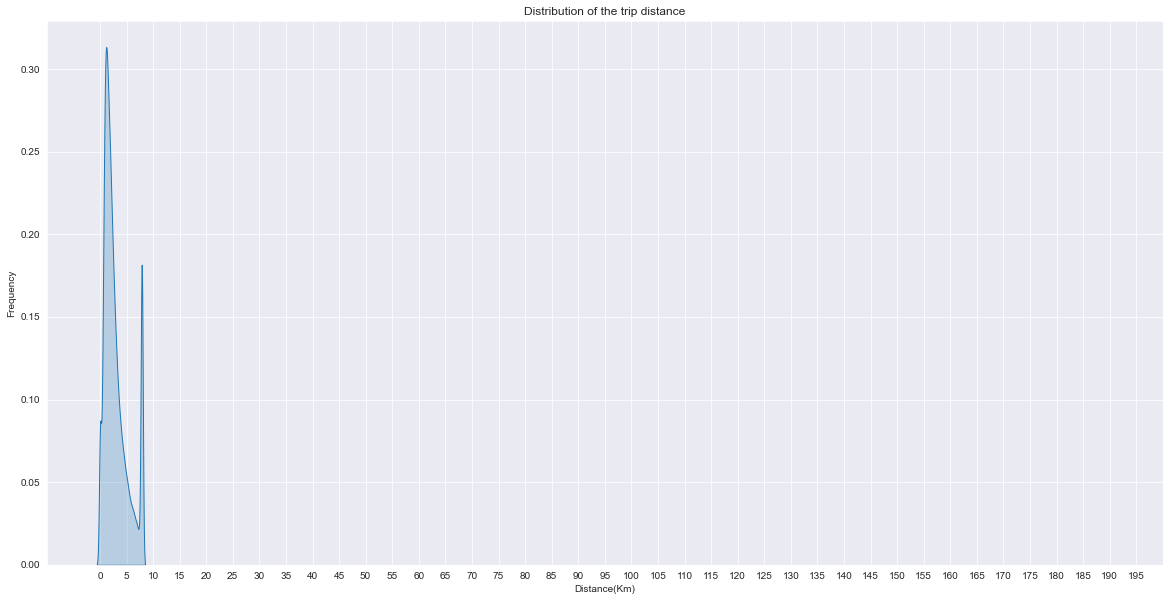

In [67]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

sns.plot = sns.kdeplot(df[df.dist_travel_km<600].dist_travel_km, shade=True)

We can see that most the trips have a travel distance of 2.5 km to 25 km. There are a few instances of 0 km as well.

# Models

**1. Split the data into features and target dataframes**

In [68]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 

In [69]:
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df['fare_amount'])

In [70]:
# use 'drop()' to remove the variable 'amount' from df_taxi
# 'axis = 1' drops the corresponding column(s)
x = df.drop('fare_amount',axis = 1)

In [71]:
x.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.929788        40.744085         -73.973082         40.761247   

   passenger_count  hour  day  month  year  dayofweek  dist_travel_km  
0              1.0    19    7      5  2015          3        1.683323  
1              1.0    20   17      7  2009          4        2.457590  
2              1.0    21   24      8  2009          0        5.036377  
3              3.0     8   26      6  2009          4        1.661683  
4              3.5    17   28      8  2014          3        4.475450

**2. Split the data into training and test sets**

In [72]:
# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",x_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",x_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (159986, 11)
The shape of X_test is: (39997, 11)
The shape of y_train is: (159986, 1)
The shape of y_test is: (39997, 1)


# 1.OLS

In [73]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
linreg_full = sm.OLS(y_train, x_train).fit()

# print the summary output
print(linreg_full.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.320e+05
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                        0.00
Time:                        15:57:22   Log-Likelihood:                     -3.9081e+05
No. Observations:              159986   AIC:                                  7.816e+05
Df Residuals:                  159975   BIC:                                  7.818e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [74]:
linreg_full_predictions = linreg_full.predict(x_test)
linreg_full_predictions

37944     13.759756
46686      9.557295
54383     13.371592
189332    20.350995
2498      14.870851
56350      6.343730
189194     7.202612
182275    11.917409
142167    21.570619
56859     13.042106
138312     7.033250
198199    11.945389
102648     9.508611
160641    13.460135
65501      8.525995
58463     10.471924
103799     7.610769
148376     4.295182
47752      6.920636
89755      8.947239
101357    18.058742
74529     16.835236
165100     8.922271
125893    17.037617
116919    10.933122
121856     5.512589
194994     7.929369
100615    14.036805
175632    11.412165
81079      4.997391
66579      6.288558
145833    11.732562
14070      7.533745
79479      7.466763
157362    19.956723
8202      12.486052
198513    10.956156
36535      5.869799
153438    10.138345
84742     19.573247
143111     6.851563
150934    10.243957
71920      5.472968
157830     5.193148
2346       5.125440
15187     16.628590
187093     5.628421
143597     4.893290
165139     6.072887
80627     19.091126


In [75]:
actual_fare = y_test["fare_amount"]
actual_fare

37944     13.00
46686      8.50
54383     10.50
189332    22.25
2498      11.50
56350      6.50
189194     6.00
182275    12.00
142167    22.25
56859     12.10
138312     4.10
198199    11.30
102648     9.50
160641    11.30
65501      6.10
58463     18.90
103799     6.90
148376     3.70
47752      6.90
89755      8.10
101357    22.25
74529     15.30
165100     7.50
125893    15.70
116919    15.00
121856     4.90
194994     6.10
100615    11.70
175632    10.50
81079      4.10
66579      4.90
145833     9.50
14070      6.00
79479      5.00
157362    18.50
8202       8.90
198513    14.00
36535      4.00
153438     9.70
84742     20.50
143111     4.50
150934    13.30
71920      6.90
157830     6.50
2346       4.90
15187     18.50
187093     4.50
143597     3.30
165139     5.30
80627     21.50
55818     10.00
141908     8.50
184236     5.30
34207     22.25
181040     6.10
190738    11.00
85982     11.70
153443    22.00
5056      10.10
91992      8.90
136018    22.25
198695    17.00
183456  

In [76]:
# calculate rmse using rmse()
linreg_full_rmse = rmse(actual_fare,linreg_full_predictions )

# calculate R-squared using rsquared
linreg_full_rsquared = linreg_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_rsquared_adj = linreg_full.rsquared_adj 

In [77]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linreg full model ",
                     'RMSE':linreg_full_rmse,
                     'R-Squared': linreg_full_rsquared,
                     'Adj. R-Squared': linreg_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared  Adj. R-Squared
0  Linreg full model   2.743892   0.941018        0.941014

# 2.Linear Regression with SGD

In [78]:
# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

In [79]:
scaler= StandardScaler()

In [80]:
scaler.fit(x)

StandardScaler()

In [81]:
x1= scaler.fit_transform(x)
x1

array([[-1.04868362, -0.46152113, -1.01921864, ...,  1.75489919,
        -0.02489213, -0.52654809],
       [-0.78235485, -0.85626619, -0.80935078, ..., -1.47731959,
         0.48872772, -0.17835635],
       [-1.30351501, -0.36735226,  0.59560498, ..., -1.47731959,
        -1.56575169,  0.98133697],
       ...,
       [-0.37578362,  0.24518342,  2.36706428, ..., -1.47731959,
        -1.56575169,  2.25346607],
       [-0.917361  , -0.9643213 , -0.30695539, ...,  1.75489919,
        -0.53851199,  0.30828083],
       [-0.29669288, -1.17381666, -0.40716061, ..., -0.93861646,
         1.00234757,  1.15285726]])

In [82]:
y1=y

In [83]:
#y1

In [84]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X1_train is:",x1_train.shape)

# print dimension of predictors test set
print("The shape of X1_test is:",x1_test.shape)

# print dimension of target train set
print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set
print("The shape of y1_test is:",y1_test.shape)

The shape of X1_train is: (159986, 11)
The shape of X1_test is: (39997, 11)
The shape of y1_train is: (159986, 1)
The shape of y1_test is: (39997, 1)


In [85]:
# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000) #Instantiation

# fit the model
SGD_model.fit(x1_train, y1_train) #Training

D:\Users\Devang\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(alpha=0.1)

In [86]:
# predict the values
y1_pred_SGD  = SGD_model.predict(x1_test)
y1_pred_SGD

array([14.86945261,  9.68042919, 12.41745033, ...,  8.5069457 ,
        8.56320059,  5.05489954])

In [87]:
r_squared_SGD = SGD_model.score(x1_train,y1_train)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))

In [88]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linear regression with SGD",
                     'RMSE':rmse_SGD,
                     'R-Squared': r_squared_SGD,
                     'Adj. R-Squared': Adj_r_squared_SGD     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared  Adj. R-Squared
0          Linreg full model   2.743892   0.941018        0.941014
1  Linear regression with SGD  2.739917   0.742091        0.742073

# 3. Decision Tree

In [89]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [90]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(x_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

In [91]:
y_pred_DT=decision_tree_model.predict(x_test)

In [92]:
y_pred_DT

array([10.9, 12.1, 10.9, ...,  7.5,  8.5,  5.3])

In [93]:
y_test

fare_amount
37944         13.00
46686          8.50
54383         10.50
189332        22.25
2498          11.50
56350          6.50
189194         6.00
182275        12.00
142167        22.25
56859         12.10
138312         4.10
198199        11.30
102648         9.50
160641        11.30
65501          6.10
58463         18.90
103799         6.90
148376         3.70
47752          6.90
89755          8.10
101357        22.25
74529         15.30
165100         7.50
125893        15.70
116919        15.00
121856         4.90
194994         6.10
100615        11.70
175632        10.50
81079          4.10
66579          4.90
145833         9.50
14070          6.00
79479          5.00
157362        18.50
8202           8.90
198513        14.00
36535          4.00
153438         9.70
84742         20.50
143111         4.50
150934        13.30
71920          6.90
157830         6.50
2346           4.90
15187         18.50
187093         4.50
143597         3.30
165139         5.30
80627         21.50
55818         10.00
141908         8.50
184236         5.30
34207         22.25
181040         6.10
190738        11.00
85982         11.70
153443        22.00
5056          10.10
91992          8.90
136018        22.25
198695        17.00
183456         8.50
90089         16.10
98559          7.50
45894         22.25
133695        18.00
188577         6.90
178512         5.90
43142          3.70
116025         7.30
124584         6.50
146622         8.90
163182         4.50
7514           6.00
151122         7.50
70083          8.90
89003          8.50
48857         10.50
82287          7.30
151818         7.50
86637         10.50
55370          5.30
100374        12.50
198463        14.90
4954           6.10
161281         8.10
41135          6.90
199753         5.50
136719         5.30
28976          5.70
190454         5.70
112555        22.25
63981          3.70
95475          5.70
125549         9.00
54577         11.70
121555         5.30
21778          4.50
26766         10.10
66024         12.50
56714          8.00
25933          6.50
188624         4.90
156391         9.50
171923         4.90
17523          2.90
84623          8.10
120249         5.00
17403         14.00
113772        12.00
77259          7.30
23272         10.50
146559         7.50
103929         4.10
112313        22.25
58711         18.50
131611        17.00
185214        12.90
93006          5.30
70181          6.50
97403         22.25
155951         6.10
192962         6.50
125546         3.30
123091         5.70
72152         14.50
16926          5.00
50547         20.90
46828         10.50
33687          4.90
9641          22.25
27194         10.00
16300         10.10
54254         10.10
144302        11.50
63824          5.50
142465         6.50
187242         8.90
102126        10.50
21650         13.00
81433         12.10
173049         4.50
140824         6.50
122964         4.10
159278         5.70
126547         6.50
28153         10.00
120573        10.50
191035        17.30
93427         12.10
72408         19.50
104024         7.30
128207         7.50
133507         9.50
165228         8.90
105422         5.50
180368         8.10
8920           5.70
43118         11.50
170046         4.90
107501         4.50
142007         7.70
19814          9.00
88706          8.00
165886        14.50
112720        14.50
178446         4.00
50259          6.10
132922        14.90
17214         22.25
182490         5.30
98555          8.50
119669        11.00
24343          7.30
166300         4.90
51801          7.40
23947         14.50
12590          6.90
188165        15.30
143309         7.00
52414         21.30
46708         14.90
147923        10.10
134175        12.90
106382         8.50
113106         7.00
106740         5.70
64283         11.00
157646         6.90
19836          9.30
101631         9.00
185765         3.50
77152          4.10
2131          13.00
155513         6.00
91536          8.90
103860         4.90
105836         4.90
45758   

In [94]:
r_squared_DT=decision_tree_model.score(x_test,y_test)
# Number of observation or sample size
n = 159999 

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.6105686606421776

In [95]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [96]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model ",
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared  Adj. R-Squared
0          Linreg full model   2.743892   0.941018        0.941014
1  Linear regression with SGD  2.739917   0.742091        0.742073
2        Decision Tree Model   3.386893   0.610595        0.610569

# 4.Decision Tree with pruning

In [97]:
# instantiate the 'DecisionTreeRegressor' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 32 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

In [98]:
y_pred_DT_prune=decision_tree_prune.predict(x_test)

In [99]:
y_pred_DT_prune

array([12.32120287, 10.08415208, 13.459628  , ...,  6.9470265 ,
        9.05833697,  4.93451661])

In [100]:
r_squared_DT_prune=decision_tree_prune.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_DT_prune = 1 - (1-r_squared_DT_prune)*(n-1)/(n-p-1)
Adj_r_squared_DT_prune
# Compute RMSE
rmse_DT_prune = sqrt(mean_squared_error(y_test, y_pred_DT_prune))

In [101]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model after pruning ",
                     'RMSE':rmse_DT_prune,
                     'R-Squared': r_squared_DT_prune,
                     'Adj. R-Squared': Adj_r_squared_DT_prune     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared  Adj. R-Squared
0                  Linreg full model   2.743892   0.941018        0.941014
1          Linear regression with SGD  2.739917   0.742091        0.742073
2                Decision Tree Model   3.386893   0.610595        0.610569
3  Decision Tree Model after pruning   2.572715   0.775311        0.775296

# 5. RandomForestRegressor

In [102]:
# import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [103]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(x_train, y_train)

C:\Users\Devang\AppData\Local\Temp/ipykernel_19068/854013030.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=10)

In [104]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(x_test)

In [105]:
y_pred_RF

array([15.656,  9.747, 11.759, ...,  7.955,  8.12 ,  4.633])

In [106]:
r_squared_RF = rf_reg.score(x_test,y_test)
# Number of observation or sample size
n = 159999  

# No of independent variables
p = 11

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
Adj_r_squared_RF
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [107]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 1.4909484238103574
Mean Squared Error (MSE): 5.598921251423695
Root Mean Squared Error (RMSE): 2.366203975024912


In [108]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared  Adj. R-Squared
0                  Linreg full model   2.743892   0.941018        0.941014
1          Linear regression with SGD  2.739917   0.742091        0.742073
2                Decision Tree Model   3.386893   0.610595        0.610569
3  Decision Tree Model after pruning   2.572715   0.775311        0.775296
4                      Random Forest   2.366204   0.809935        0.809922